In [3]:
import torch
import matplotlib.pyplot as plt

import time

import os.path as osp
import numpy as np

from dataset import make_dataset
from train import make_data_loader, train_step, test_evaluations
from utils import get_device, plot_training_progress
from model import GCNNetwork

from args import *
from utils import *

In [4]:
train_dataset, validation_dataset, test_dataset = make_dataset()
train_loader, val_loader, test_loader = make_data_loader(train_dataset, validation_dataset, test_dataset)

In [7]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

device = torch.device("cuda")

in_dim = train_dataset[0].x.shape[-1]
model = GCNNetwork(in_dim)
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=args["learning_rate"])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=10, min_lr=1e-8)

25092 8364 8363


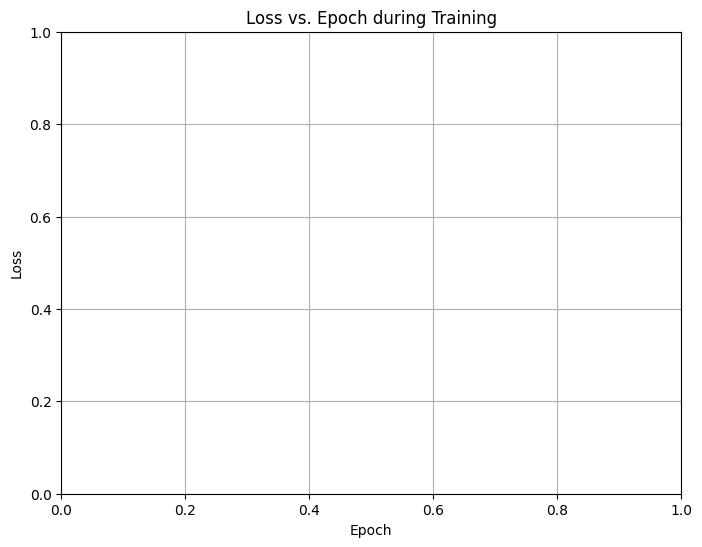

In [8]:
epochs = args["epochs"]

train_losses = []
test_losses = []
val_losses = []

plt.figure(figsize=(8, 6))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch during Training")
plt.grid(True)

Epoch 1, training loss(MAE)=0.0593, validating loss(MAE)=0.0617, testing loss(MAE)=0.0613, lr=0.01


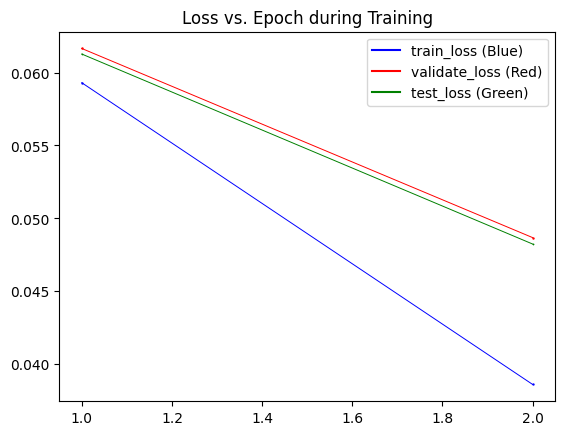

Epoch 2, training loss(MAE)=0.0386, validating loss(MAE)=0.0487, testing loss(MAE)=0.0482, lr=0.01
Epoch 3, training loss(MAE)=0.0354, validating loss(MAE)=0.035, testing loss(MAE)=0.0352, lr=0.01


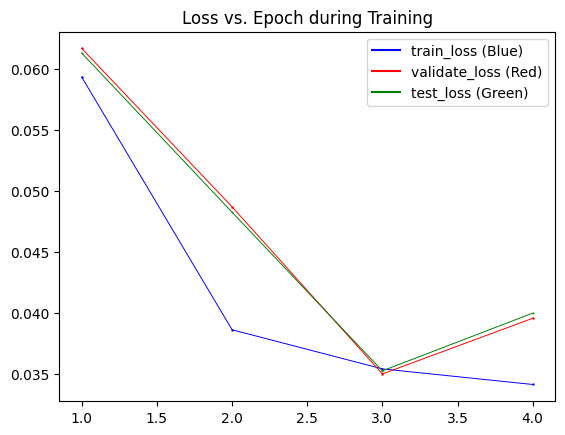

Epoch 4, training loss(MAE)=0.0341, validating loss(MAE)=0.0395, testing loss(MAE)=0.04, lr=0.01
Epoch 5, training loss(MAE)=0.0341, validating loss(MAE)=0.0411, testing loss(MAE)=0.0413, lr=0.01


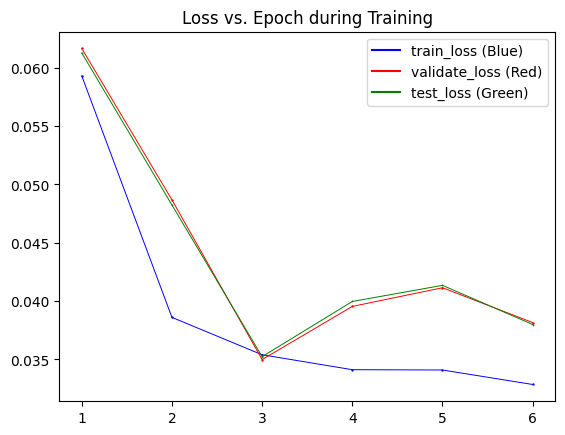

Epoch 6, training loss(MAE)=0.0329, validating loss(MAE)=0.0382, testing loss(MAE)=0.038, lr=0.01
Epoch 7, training loss(MAE)=0.0333, validating loss(MAE)=0.0372, testing loss(MAE)=0.0378, lr=0.01


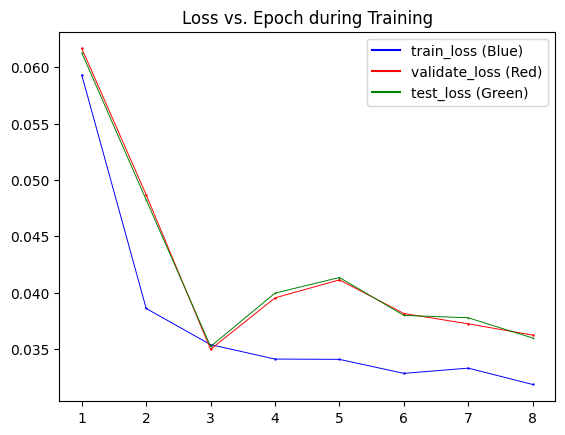

Epoch 8, training loss(MAE)=0.0319, validating loss(MAE)=0.0362, testing loss(MAE)=0.036, lr=0.01
Epoch 9, training loss(MAE)=0.0345, validating loss(MAE)=0.0431, testing loss(MAE)=0.0435, lr=0.01


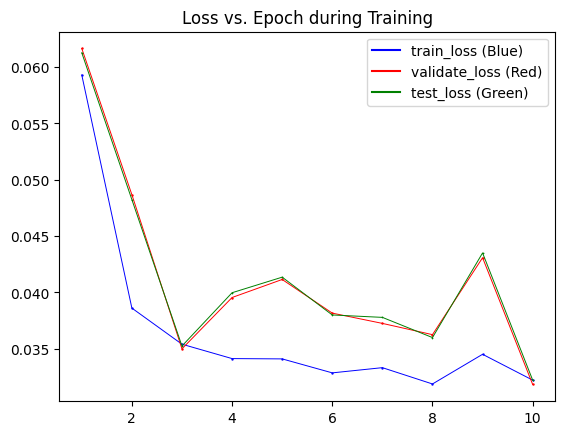

Epoch 10, training loss(MAE)=0.0322, validating loss(MAE)=0.0318, testing loss(MAE)=0.0322, lr=0.01
Epoch 11, training loss(MAE)=0.0317, validating loss(MAE)=0.033, testing loss(MAE)=0.033, lr=0.01


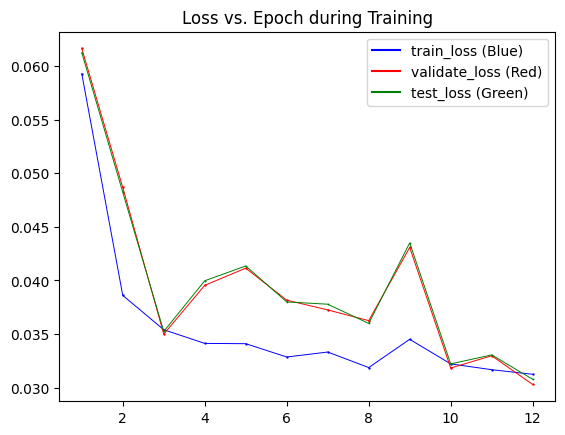

Epoch 12, training loss(MAE)=0.0312, validating loss(MAE)=0.0303, testing loss(MAE)=0.0308, lr=0.01
Epoch 13, training loss(MAE)=0.0312, validating loss(MAE)=0.031, testing loss(MAE)=0.0318, lr=0.01


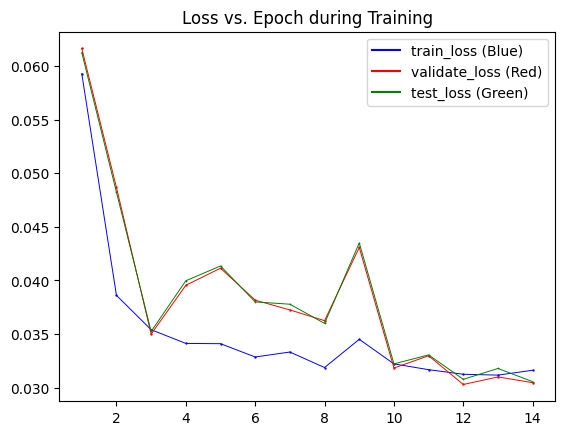

Epoch 14, training loss(MAE)=0.0316, validating loss(MAE)=0.0305, testing loss(MAE)=0.0305, lr=0.01
Epoch 15, training loss(MAE)=0.0304, validating loss(MAE)=0.0308, testing loss(MAE)=0.0312, lr=0.01


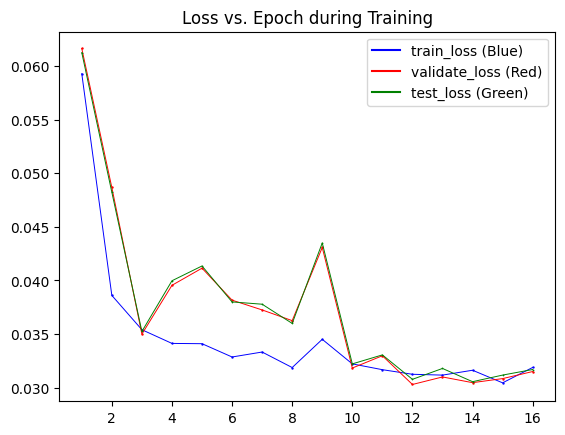

Epoch 16, training loss(MAE)=0.0319, validating loss(MAE)=0.0315, testing loss(MAE)=0.0317, lr=0.01
Epoch 17, training loss(MAE)=0.0313, validating loss(MAE)=0.0344, testing loss(MAE)=0.0353, lr=0.01


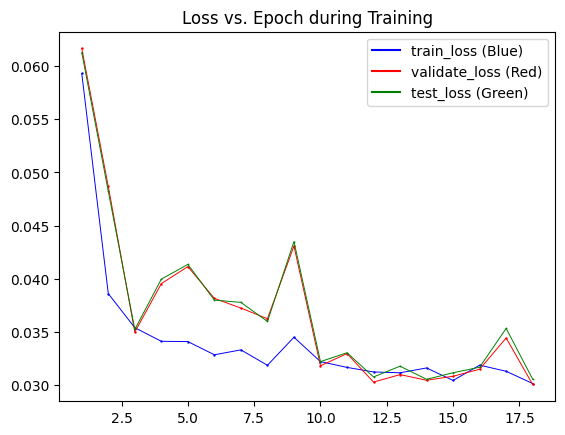

Epoch 18, training loss(MAE)=0.0302, validating loss(MAE)=0.0301, testing loss(MAE)=0.0306, lr=0.01
Epoch 19, training loss(MAE)=0.0293, validating loss(MAE)=0.0275, testing loss(MAE)=0.0274, lr=0.01


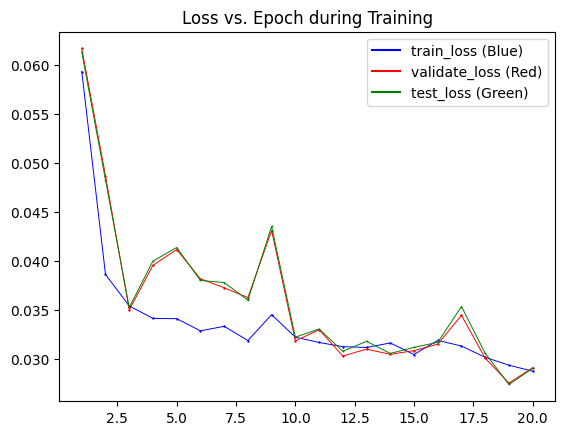

Epoch 20, training loss(MAE)=0.0287, validating loss(MAE)=0.0291, testing loss(MAE)=0.029, lr=0.01
Epoch 21, training loss(MAE)=0.0291, validating loss(MAE)=0.0303, testing loss(MAE)=0.0307, lr=0.01


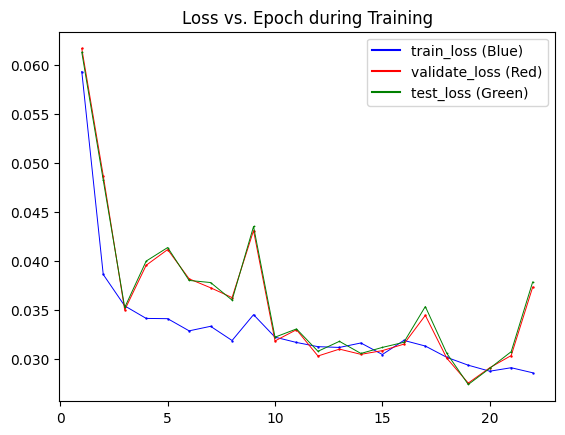

Epoch 22, training loss(MAE)=0.0286, validating loss(MAE)=0.0373, testing loss(MAE)=0.0378, lr=0.01
Epoch 23, training loss(MAE)=0.0286, validating loss(MAE)=0.0326, testing loss(MAE)=0.0328, lr=0.01


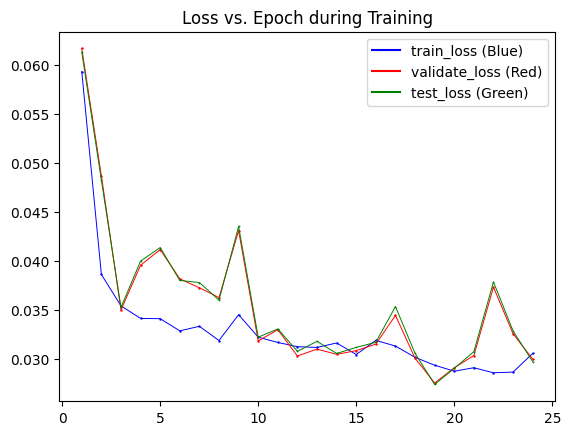

Epoch 24, training loss(MAE)=0.0305, validating loss(MAE)=0.03, testing loss(MAE)=0.0297, lr=0.01
Epoch 25, training loss(MAE)=0.0272, validating loss(MAE)=0.0309, testing loss(MAE)=0.0312, lr=0.01


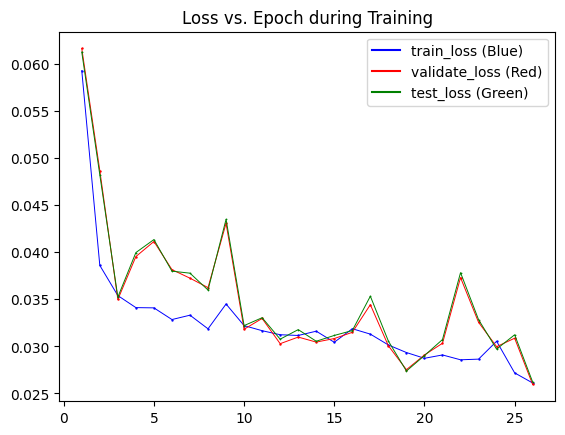

Epoch 26, training loss(MAE)=0.0261, validating loss(MAE)=0.026, testing loss(MAE)=0.0262, lr=0.01
Epoch 27, training loss(MAE)=0.026, validating loss(MAE)=0.0284, testing loss(MAE)=0.0286, lr=0.01


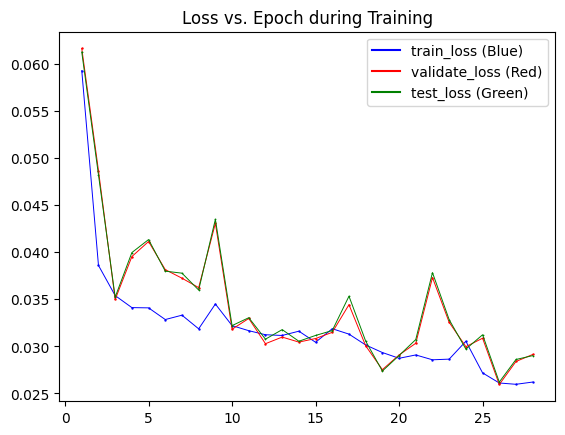

Epoch 28, training loss(MAE)=0.0262, validating loss(MAE)=0.0291, testing loss(MAE)=0.029, lr=0.01
Epoch 29, training loss(MAE)=0.0275, validating loss(MAE)=0.0266, testing loss(MAE)=0.0268, lr=0.01


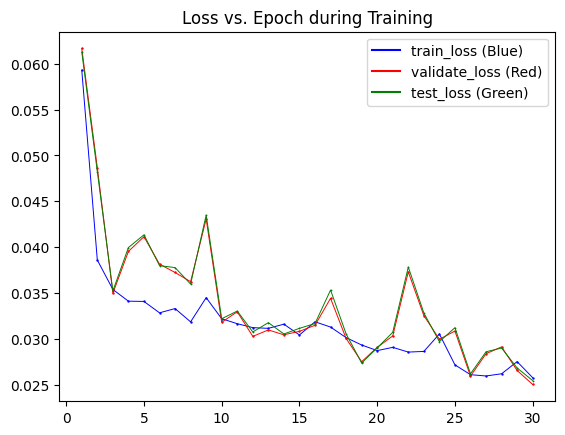

Epoch 30, training loss(MAE)=0.0258, validating loss(MAE)=0.025, testing loss(MAE)=0.0255, lr=0.01
Epoch 31, training loss(MAE)=0.0263, validating loss(MAE)=0.045, testing loss(MAE)=0.0452, lr=0.01


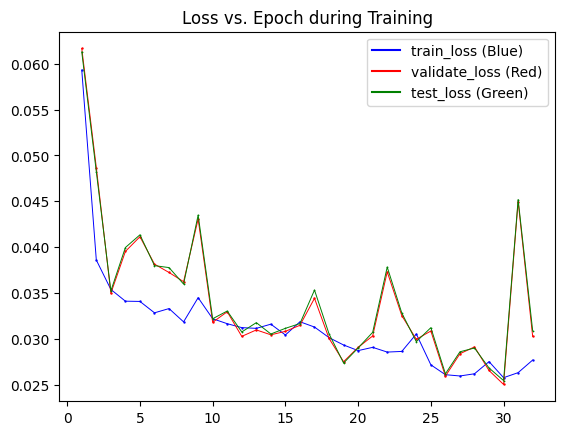

Epoch 32, training loss(MAE)=0.0277, validating loss(MAE)=0.0303, testing loss(MAE)=0.0309, lr=0.01
Epoch 33, training loss(MAE)=0.0261, validating loss(MAE)=0.0319, testing loss(MAE)=0.0324, lr=0.01


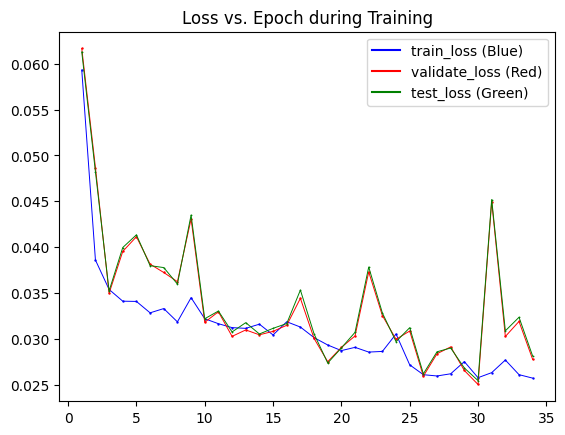

Epoch 34, training loss(MAE)=0.0257, validating loss(MAE)=0.0278, testing loss(MAE)=0.0281, lr=0.01
Epoch 35, training loss(MAE)=0.0253, validating loss(MAE)=0.0408, testing loss(MAE)=0.0409, lr=0.01


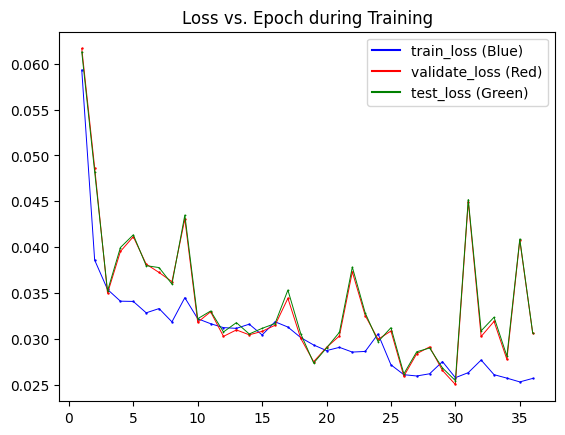

Epoch 36, training loss(MAE)=0.0257, validating loss(MAE)=0.0306, testing loss(MAE)=0.0307, lr=0.01
Epoch 37, training loss(MAE)=0.0253, validating loss(MAE)=0.0272, testing loss(MAE)=0.0275, lr=0.01


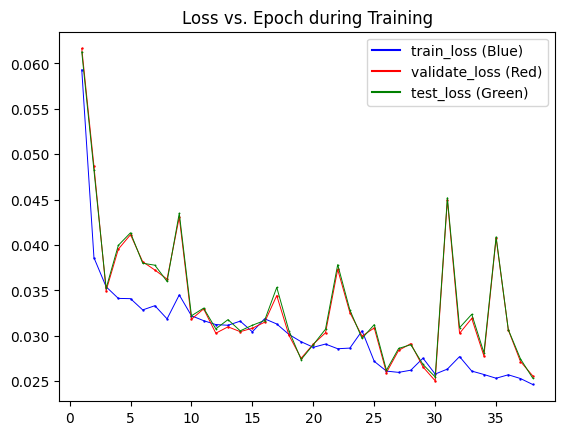

Epoch 38, training loss(MAE)=0.0246, validating loss(MAE)=0.0256, testing loss(MAE)=0.0253, lr=0.01
Epoch 39, training loss(MAE)=0.025, validating loss(MAE)=0.0265, testing loss(MAE)=0.0269, lr=0.01


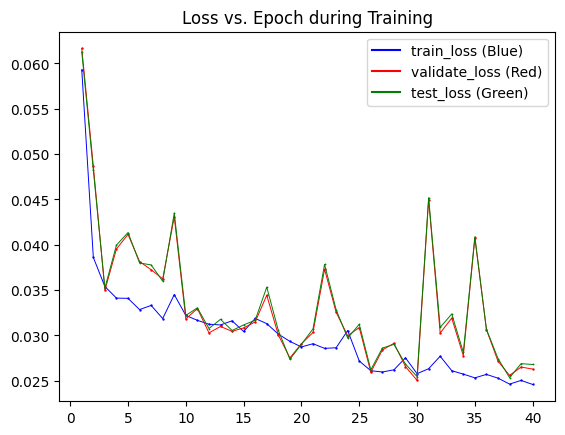

Epoch 40, training loss(MAE)=0.0246, validating loss(MAE)=0.0263, testing loss(MAE)=0.0268, lr=0.01
Epoch 41, training loss(MAE)=0.0244, validating loss(MAE)=0.0309, testing loss(MAE)=0.0313, lr=0.005


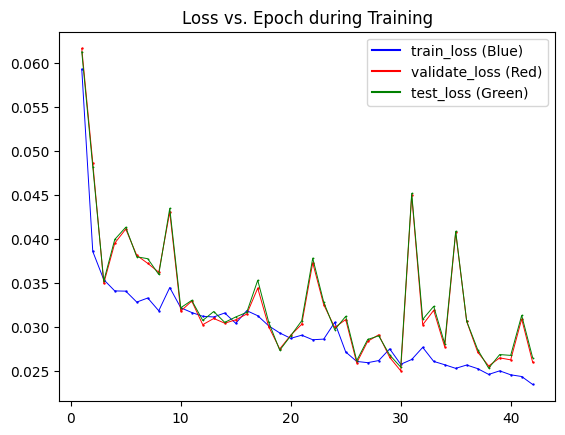

Epoch 42, training loss(MAE)=0.0235, validating loss(MAE)=0.026, testing loss(MAE)=0.0265, lr=0.005
Epoch 43, training loss(MAE)=0.0228, validating loss(MAE)=0.0243, testing loss(MAE)=0.0248, lr=0.005


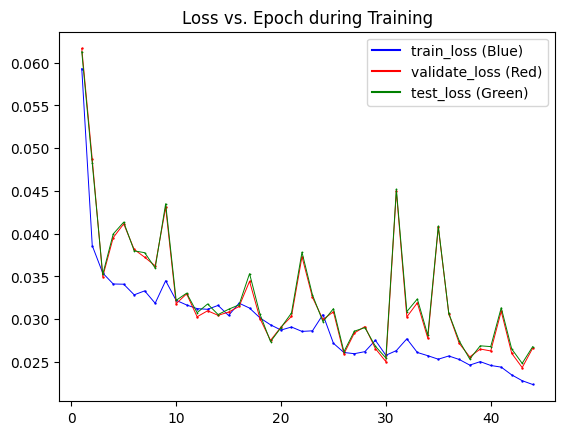

Epoch 44, training loss(MAE)=0.0224, validating loss(MAE)=0.0266, testing loss(MAE)=0.0268, lr=0.005
Epoch 45, training loss(MAE)=0.0223, validating loss(MAE)=0.0282, testing loss(MAE)=0.0285, lr=0.005


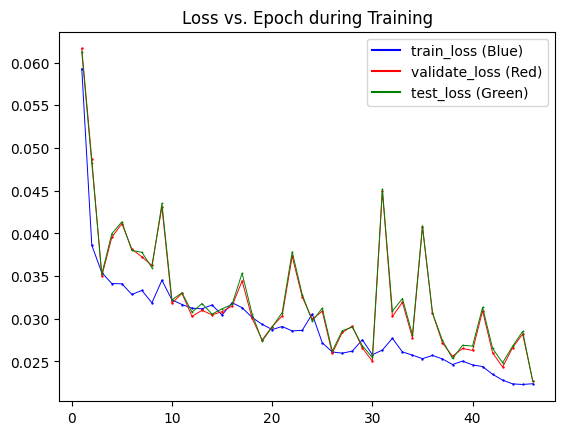

Epoch 46, training loss(MAE)=0.0224, validating loss(MAE)=0.0228, testing loss(MAE)=0.0227, lr=0.005
Epoch 47, training loss(MAE)=0.0219, validating loss(MAE)=0.0226, testing loss(MAE)=0.0226, lr=0.005


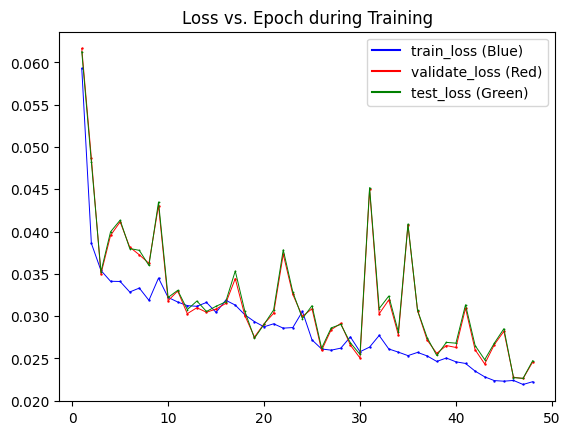

Epoch 48, training loss(MAE)=0.0222, validating loss(MAE)=0.0246, testing loss(MAE)=0.0247, lr=0.005
Epoch 49, training loss(MAE)=0.0224, validating loss(MAE)=0.0228, testing loss(MAE)=0.0226, lr=0.005


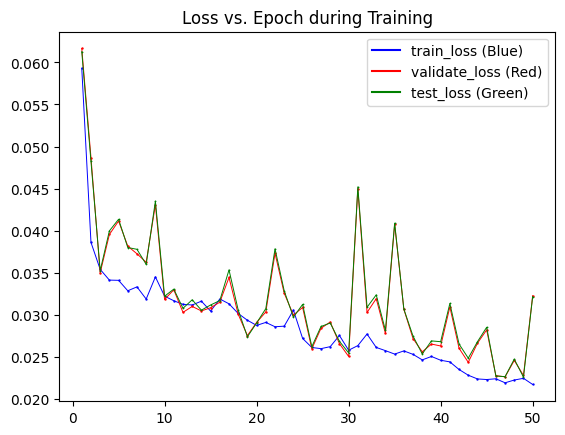

Epoch 50, training loss(MAE)=0.0217, validating loss(MAE)=0.0323, testing loss(MAE)=0.0322, lr=0.005
Epoch 51, training loss(MAE)=0.0243, validating loss(MAE)=0.0212, testing loss(MAE)=0.0216, lr=0.005


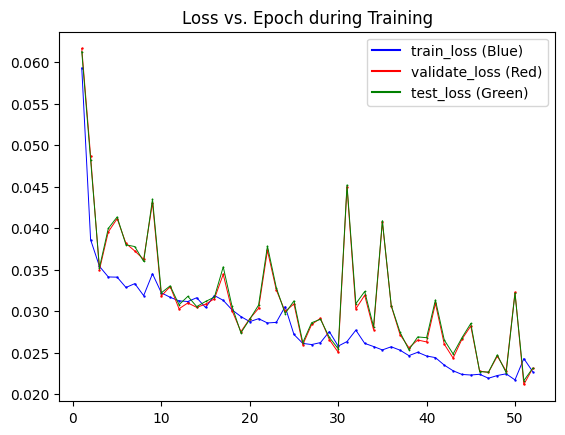

Epoch 52, training loss(MAE)=0.0227, validating loss(MAE)=0.0231, testing loss(MAE)=0.0231, lr=0.005
Epoch 53, training loss(MAE)=0.0221, validating loss(MAE)=0.0243, testing loss(MAE)=0.0246, lr=0.005


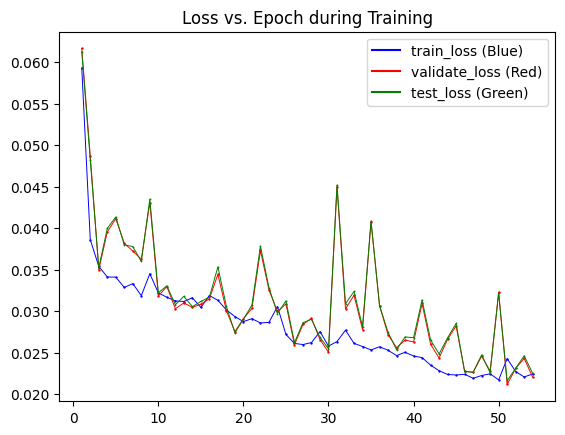

Epoch 54, training loss(MAE)=0.0224, validating loss(MAE)=0.022, testing loss(MAE)=0.0225, lr=0.005
Epoch 55, training loss(MAE)=0.0215, validating loss(MAE)=0.0218, testing loss(MAE)=0.0219, lr=0.005


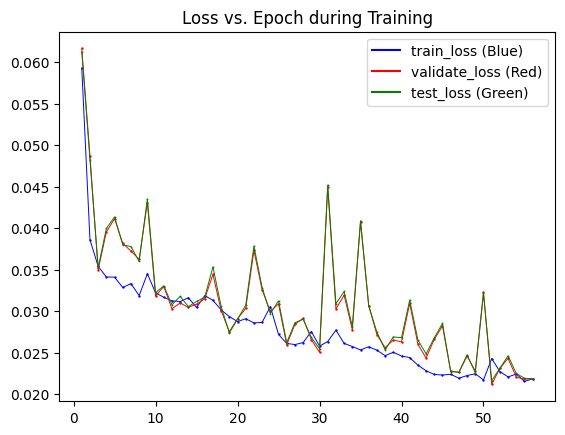

Epoch 56, training loss(MAE)=0.0218, validating loss(MAE)=0.0218, testing loss(MAE)=0.0219, lr=0.005
Epoch 57, training loss(MAE)=0.0217, validating loss(MAE)=0.0218, testing loss(MAE)=0.0219, lr=0.005


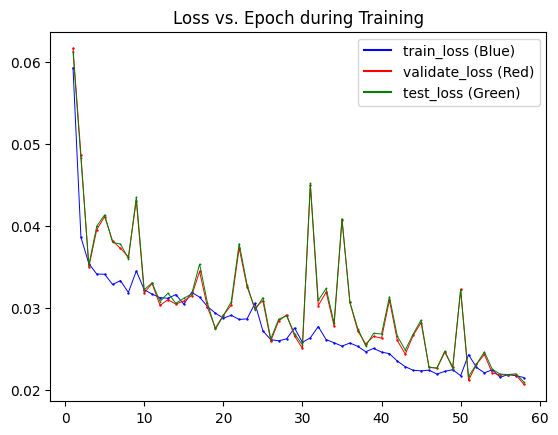

Epoch 58, training loss(MAE)=0.0215, validating loss(MAE)=0.0206, testing loss(MAE)=0.0209, lr=0.005
Epoch 59, training loss(MAE)=0.0219, validating loss(MAE)=0.0232, testing loss(MAE)=0.0236, lr=0.005


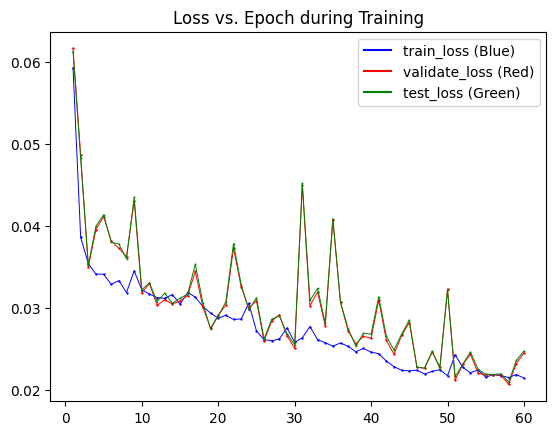

Epoch 60, training loss(MAE)=0.0214, validating loss(MAE)=0.0245, testing loss(MAE)=0.0247, lr=0.005
Epoch 61, training loss(MAE)=0.0213, validating loss(MAE)=0.0234, testing loss(MAE)=0.0237, lr=0.005


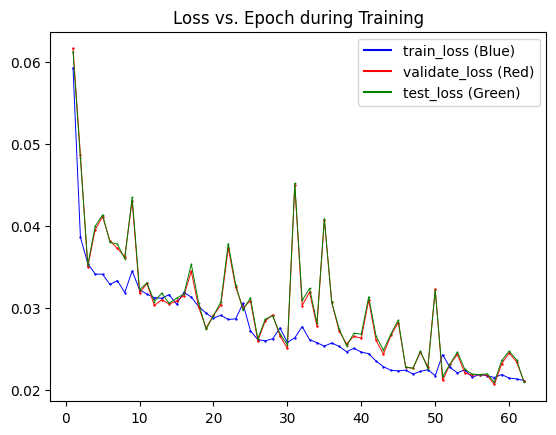

Epoch 62, training loss(MAE)=0.0211, validating loss(MAE)=0.021, testing loss(MAE)=0.0209, lr=0.005
Epoch 63, training loss(MAE)=0.0209, validating loss(MAE)=0.0213, testing loss(MAE)=0.0222, lr=0.005


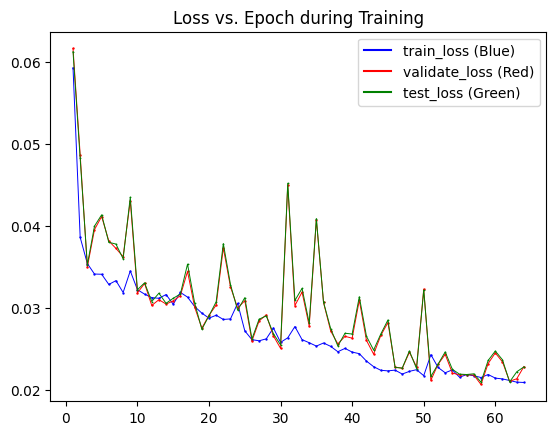

Epoch 64, training loss(MAE)=0.0209, validating loss(MAE)=0.0228, testing loss(MAE)=0.0228, lr=0.005
Epoch 65, training loss(MAE)=0.0211, validating loss(MAE)=0.0218, testing loss(MAE)=0.0224, lr=0.005


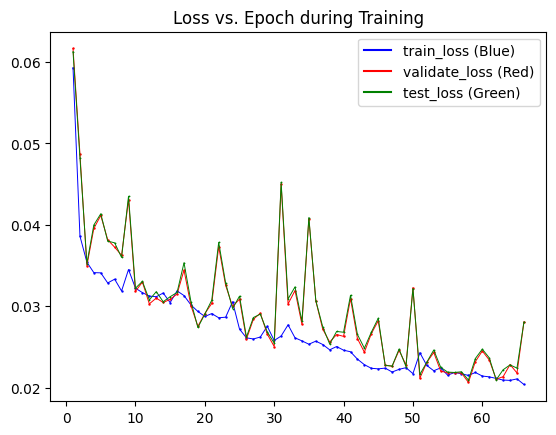

Epoch 66, training loss(MAE)=0.0204, validating loss(MAE)=0.0281, testing loss(MAE)=0.0281, lr=0.005
Epoch 67, training loss(MAE)=0.0213, validating loss(MAE)=0.0237, testing loss(MAE)=0.0242, lr=0.005


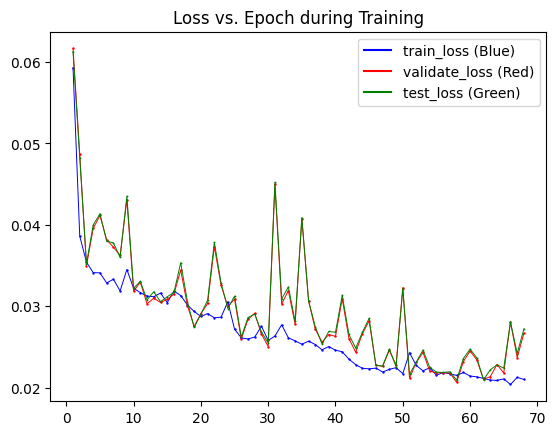

Epoch 68, training loss(MAE)=0.021, validating loss(MAE)=0.0267, testing loss(MAE)=0.0272, lr=0.005
Epoch 69, training loss(MAE)=0.0209, validating loss(MAE)=0.0274, testing loss(MAE)=0.0277, lr=0.0025


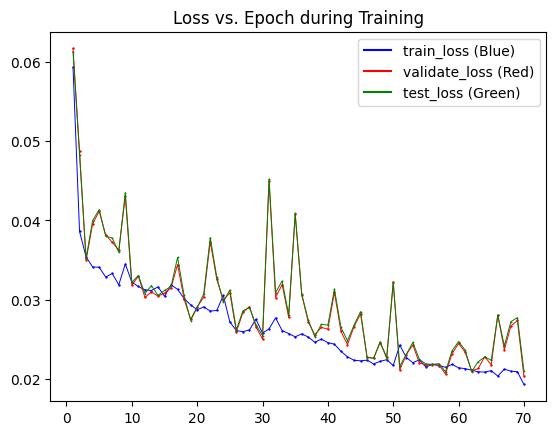

Epoch 70, training loss(MAE)=0.0193, validating loss(MAE)=0.0203, testing loss(MAE)=0.0211, lr=0.0025
Epoch 71, training loss(MAE)=0.0188, validating loss(MAE)=0.023, testing loss(MAE)=0.0237, lr=0.0025


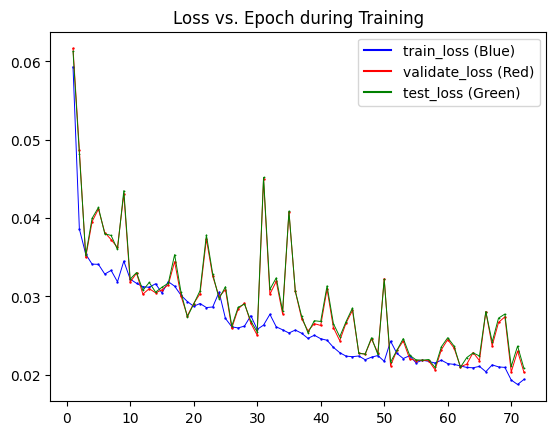

Epoch 72, training loss(MAE)=0.0194, validating loss(MAE)=0.0203, testing loss(MAE)=0.0208, lr=0.0025
Epoch 73, training loss(MAE)=0.0184, validating loss(MAE)=0.0201, testing loss(MAE)=0.0207, lr=0.0025


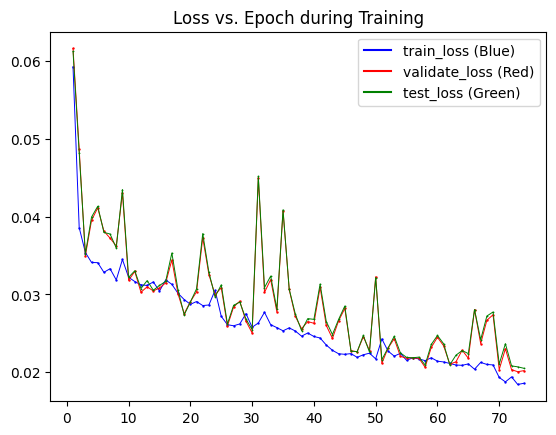

Epoch 74, training loss(MAE)=0.0186, validating loss(MAE)=0.0202, testing loss(MAE)=0.0205, lr=0.0025
Epoch 75, training loss(MAE)=0.0186, validating loss(MAE)=0.0215, testing loss(MAE)=0.0218, lr=0.0025


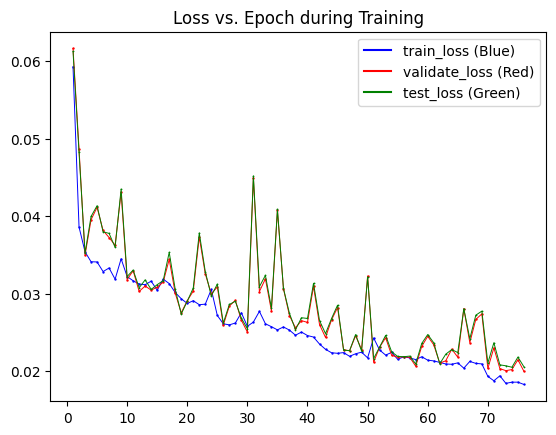

Epoch 76, training loss(MAE)=0.0183, validating loss(MAE)=0.02, testing loss(MAE)=0.0206, lr=0.0025
Epoch 77, training loss(MAE)=0.0184, validating loss(MAE)=0.0198, testing loss(MAE)=0.0204, lr=0.0025


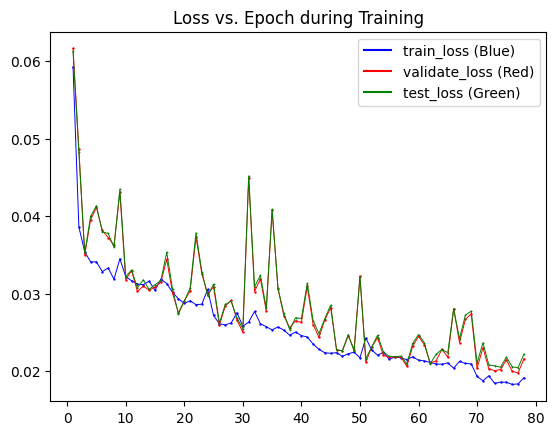

Epoch 78, training loss(MAE)=0.0191, validating loss(MAE)=0.0216, testing loss(MAE)=0.0222, lr=0.0025
Epoch 79, training loss(MAE)=0.018, validating loss(MAE)=0.0215, testing loss(MAE)=0.0223, lr=0.0025


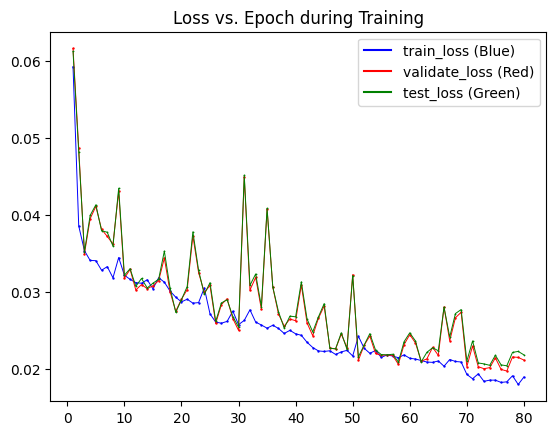

Epoch 80, training loss(MAE)=0.019, validating loss(MAE)=0.0212, testing loss(MAE)=0.0219, lr=0.0025
Epoch 81, training loss(MAE)=0.0182, validating loss(MAE)=0.0203, testing loss(MAE)=0.0209, lr=0.0025


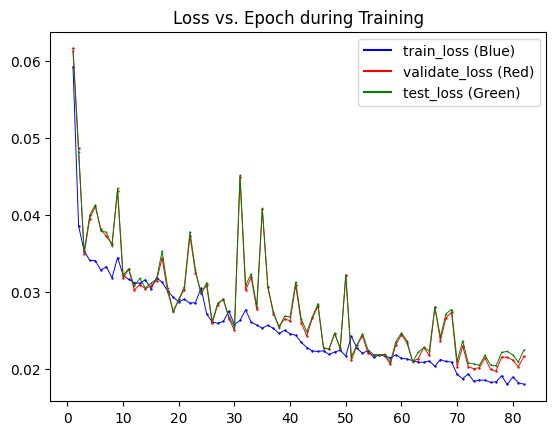

Epoch 82, training loss(MAE)=0.018, validating loss(MAE)=0.0217, testing loss(MAE)=0.0225, lr=0.0025
Epoch 83, training loss(MAE)=0.0178, validating loss(MAE)=0.0208, testing loss(MAE)=0.0213, lr=0.0025


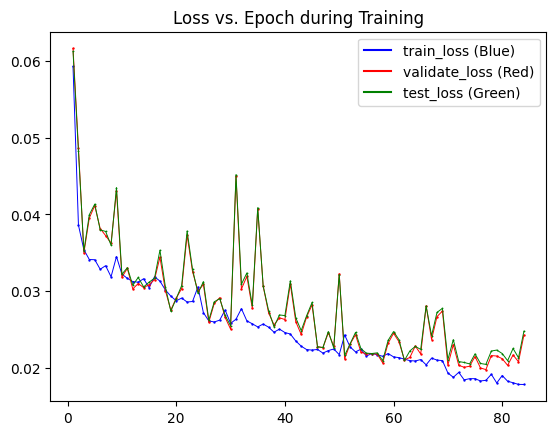

Epoch 84, training loss(MAE)=0.0178, validating loss(MAE)=0.0243, testing loss(MAE)=0.0248, lr=0.0025
Epoch 85, training loss(MAE)=0.018, validating loss(MAE)=0.0206, testing loss(MAE)=0.0212, lr=0.0025


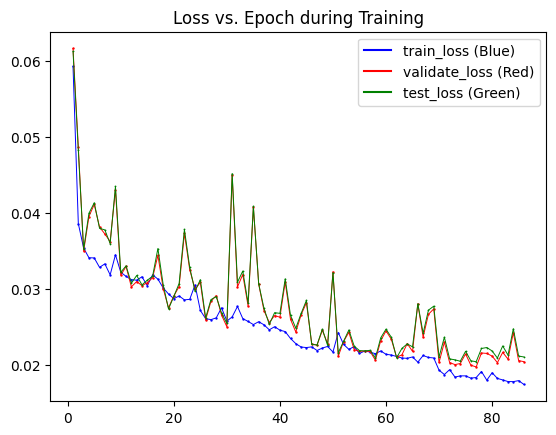

Epoch 86, training loss(MAE)=0.0174, validating loss(MAE)=0.0204, testing loss(MAE)=0.0211, lr=0.0025
Epoch 87, training loss(MAE)=0.0176, validating loss(MAE)=0.02, testing loss(MAE)=0.0206, lr=0.0025


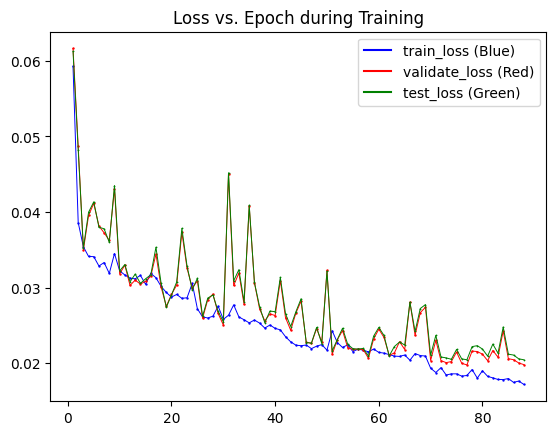

Epoch 88, training loss(MAE)=0.0172, validating loss(MAE)=0.0198, testing loss(MAE)=0.0204, lr=0.00125
Epoch 89, training loss(MAE)=0.017, validating loss(MAE)=0.0219, testing loss(MAE)=0.0225, lr=0.00125


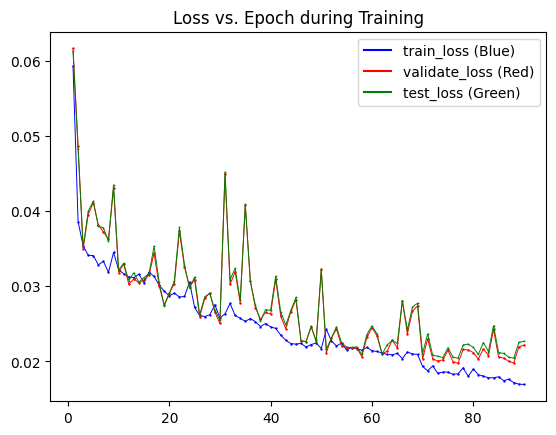

Epoch 90, training loss(MAE)=0.0169, validating loss(MAE)=0.0222, testing loss(MAE)=0.0227, lr=0.00125
Epoch 91, training loss(MAE)=0.0171, validating loss(MAE)=0.0202, testing loss(MAE)=0.0208, lr=0.00125


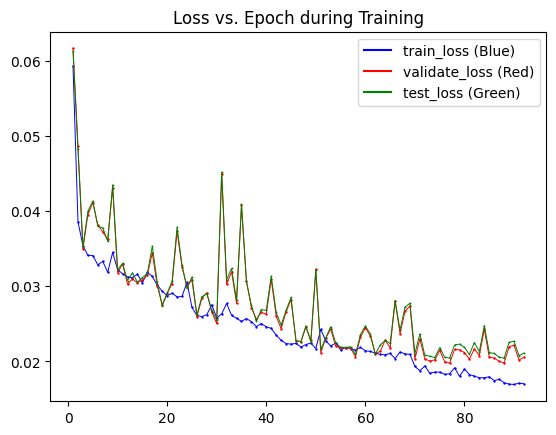

Epoch 92, training loss(MAE)=0.017, validating loss(MAE)=0.0206, testing loss(MAE)=0.0211, lr=0.00125
Epoch 93, training loss(MAE)=0.0165, validating loss(MAE)=0.0222, testing loss(MAE)=0.0226, lr=0.00125


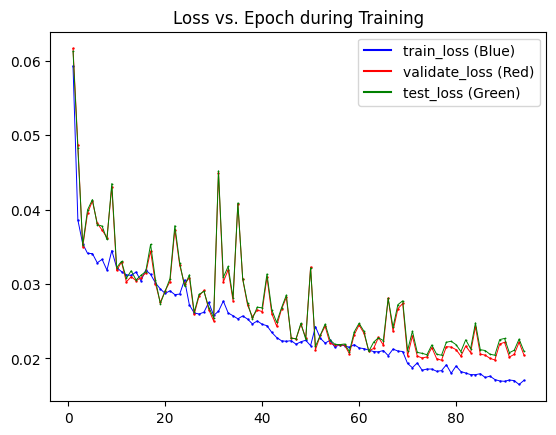

Epoch 94, training loss(MAE)=0.0171, validating loss(MAE)=0.0205, testing loss(MAE)=0.021, lr=0.00125
Epoch 95, training loss(MAE)=0.0167, validating loss(MAE)=0.0205, testing loss(MAE)=0.0211, lr=0.00125


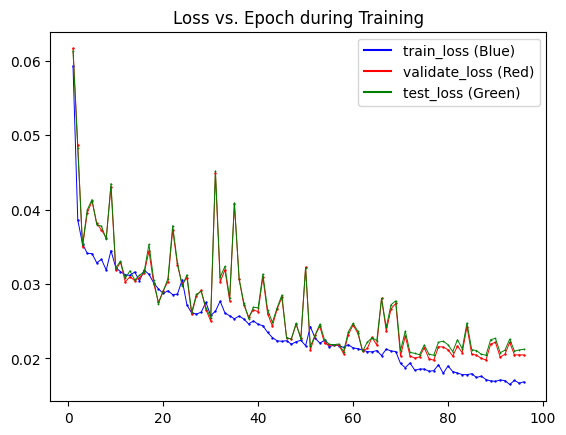

Epoch 96, training loss(MAE)=0.0169, validating loss(MAE)=0.0205, testing loss(MAE)=0.0212, lr=0.00125
Epoch 97, training loss(MAE)=0.0167, validating loss(MAE)=0.0204, testing loss(MAE)=0.021, lr=0.00125


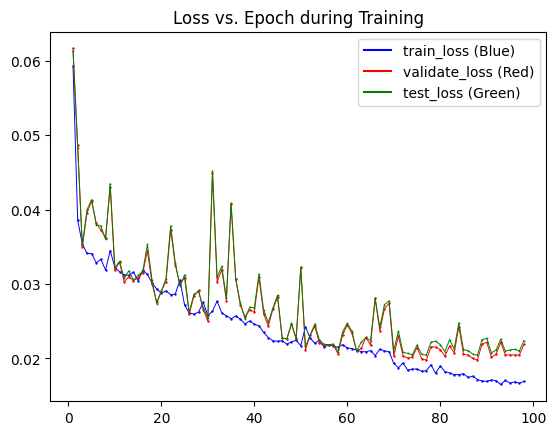

Epoch 98, training loss(MAE)=0.0169, validating loss(MAE)=0.0219, testing loss(MAE)=0.0224, lr=0.00125
Epoch 99, training loss(MAE)=0.0166, validating loss(MAE)=0.0215, testing loss(MAE)=0.022, lr=0.000625


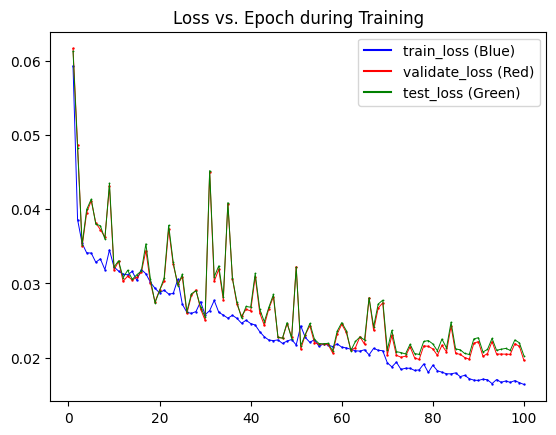

Epoch 100, training loss(MAE)=0.0164, validating loss(MAE)=0.0196, testing loss(MAE)=0.0203, lr=0.000625
Epoch 101, training loss(MAE)=0.0163, validating loss(MAE)=0.0201, testing loss(MAE)=0.0206, lr=0.000625


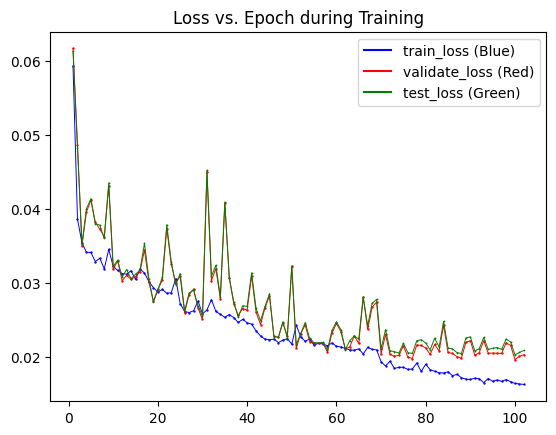

Epoch 102, training loss(MAE)=0.0163, validating loss(MAE)=0.0203, testing loss(MAE)=0.0208, lr=0.000625
Epoch 103, training loss(MAE)=0.0159, validating loss(MAE)=0.0201, testing loss(MAE)=0.0207, lr=0.000625


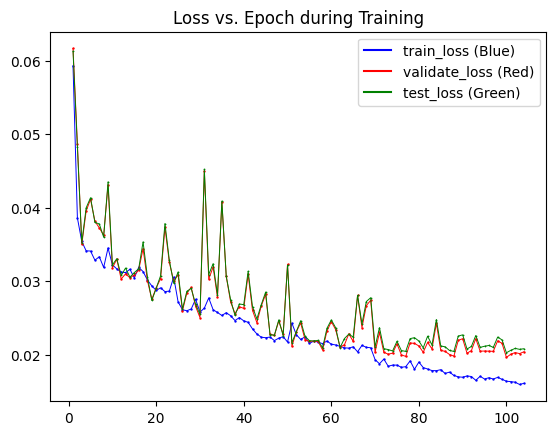

Epoch 104, training loss(MAE)=0.0161, validating loss(MAE)=0.0204, testing loss(MAE)=0.0208, lr=0.000625
Epoch 105, training loss(MAE)=0.0158, validating loss(MAE)=0.0197, testing loss(MAE)=0.0203, lr=0.000625


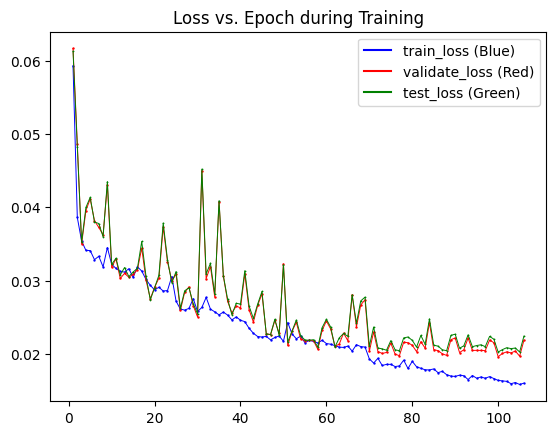

Epoch 106, training loss(MAE)=0.016, validating loss(MAE)=0.0219, testing loss(MAE)=0.0224, lr=0.000625
Epoch 107, training loss(MAE)=0.0162, validating loss(MAE)=0.0197, testing loss(MAE)=0.0202, lr=0.000625


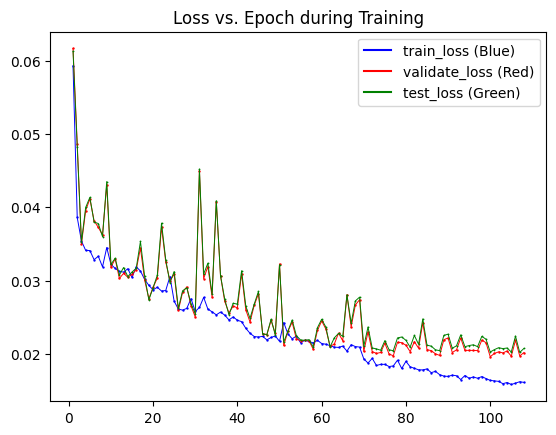

Epoch 108, training loss(MAE)=0.0161, validating loss(MAE)=0.0202, testing loss(MAE)=0.0207, lr=0.000625


In [9]:
epochs = 1000

for epoch in range(1, epochs + 1):

    model, train_loss = train_step(model, train_loader, train_dataset, optimizer, device)
    val_loss, _, _ = test_evaluations(model, val_loader, validation_dataset, device, ret_data=False)
    test_loss, _, _ = test_evaluations(model, test_loader, test_dataset, device, ret_data=False)

    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]["lr"]

    progress_msg = "Epoch " + str(epoch)
    progress_msg += ", training loss(MAE)=" + str(round(train_loss, 4))
    progress_msg += ", validating loss(MAE)=" + str(round(val_loss, 4))
    progress_msg += ", testing loss(MAE)=" + str(round(test_loss, 4))
    progress_msg += ", lr=" + str(round(current_lr, 8))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    plot_training_progress(len(train_losses), train_losses, val_losses, test_losses, split=5)
    print(progress_msg)

MAE loss of formation energy is:  0.2273966372013092


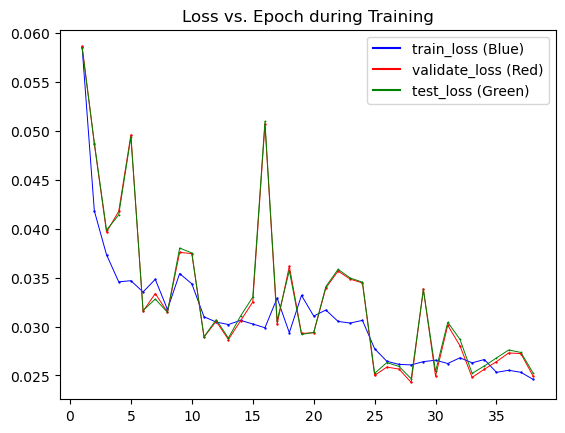

MAE=  2.2186401314290918


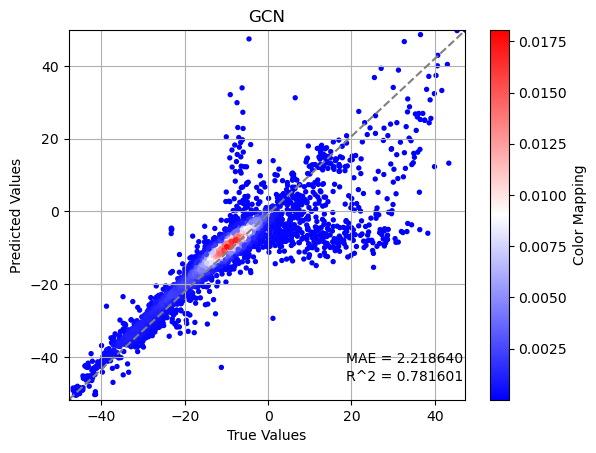

In [7]:
result_path = createResultFolder()
save_hyper_parameter(args, result_path)
save_train_progress(epoch - 1, train_losses, val_losses, test_losses, result_path)
test_loss, test_out, test_y = test_evaluations(model, test_loader, test_dataset, device, ret_data=True)

# Reverse normalization of test_out and y
min, max = get_data_scale(args)
test_y = reverse_min_max_scalar_1d(test_y, min, max)
test_out = reverse_min_max_scalar_1d(test_out, min, max)
loss = (test_out.squeeze() - test_y).abs().mean()
print("MAE loss of formation energy is: ", loss.item())

# save results
plot_training_progress(len(train_losses), train_losses, val_losses, test_losses, res_path=result_path)
save_regression_result(test_out, test_y, result_path)
plot_regression_result("GCN", result_path, plotfilename="regression_figure.jpeg")